# Car Price Prediction with ML

✅ This assignment is completed by `Mohammad Khorshed Alam`

---

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

# Data Exploration & Error Handling

In [4]:
df.shape

(202, 26)

In [10]:
# Checking for duplicated rows
df.duplicated().sum()

np.int64(1)

In [13]:
# Droping duplicated row
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(201, 26)

In [17]:
# Checking for null values
df.isna().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [18]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [23]:
num_cols = df.select_dtypes(include=['int', 'float']) # Numerical features
cat_cols = df.select_dtypes(include='object') # Categorical features

print(f'Number of numerical features: {num_cols.shape[1]}')
print(f'Number of categorical features: {cat_cols.shape[1]}')


Number of numerical features: 12
Number of categorical features: 14


⭐ **Conclusions:**
- Total values 201 and Total columns (features) 26 (initially was 202, 26).
- There was one duplicated row, which was dropped.
- 37 null values in `normalized-losses` feature, and 2 in `num-of-doors` feature.
- In this dataset, there are 12 numerical features and 14 categorical features.

## Missing Value Handling

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### For normalized-losses Feature
- 37 missing values in this feature

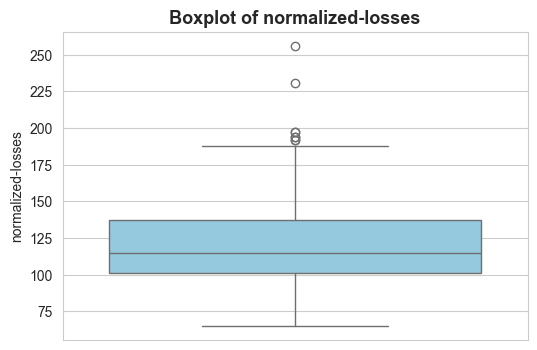

In [55]:
sns.set_style('whitegrid')

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='normalized-losses', color='skyblue')
plt.title('Boxplot of normalized-losses', fontsize=13, fontweight='bold')
plt.show()

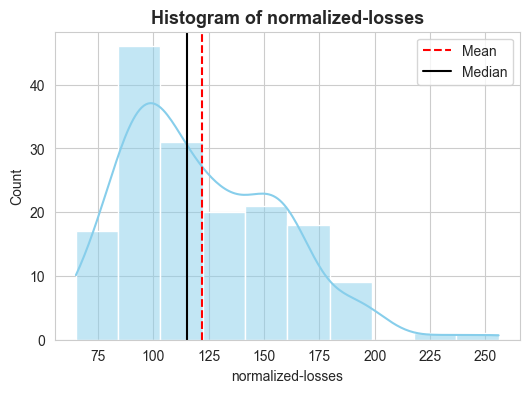

In [39]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='normalized-losses', color='skyblue', kde=True)
plt.axvline(df['normalized-losses'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['normalized-losses'].median(), color='black', label='Median')
plt.title('Histogram of normalized-losses', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

There is outlier in this feature and median is lower than mean, hence it is better to fill the null values with median.

In [45]:
median = df['normalized-losses'].median()
median

np.float64(115.0)

In [69]:
# Filling the missing values
df['normalized-losses'].fillna(median, inplace=True)

In [71]:
df['normalized-losses'].isna().sum()

np.int64(0)

### For num-of-doors Feature
- 2 missing values in this feature

In [58]:
df['num-of-doors'].value_counts()

num-of-doors
four    113
two      86
Name: count, dtype: int64

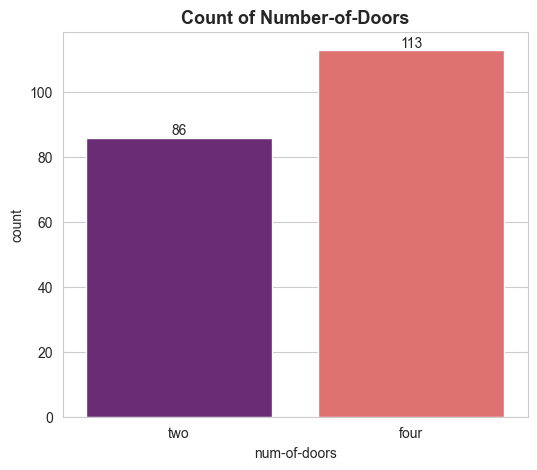

In [66]:
plt.figure(figsize=(6,5))
ax = sns.countplot(data=df, x='num-of-doors', palette='magma')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Count of Number-of-Doors', fontsize=13, fontweight='bold')
plt.show()

`Four` doors are more frequent than `Two` in this dataset. That is why, it would be better to fill the missing values with `Four`. 

In [68]:
most_freq = df['num-of-doors'].mode()[0]
most_freq

'four'

In [70]:
# Filling the missing values
df['num-of-doors'].fillna(most_freq, inplace=True)

In [73]:
df['num-of-doors'].isna().sum()

np.int64(0)

⭐ **Conclusions:**
- Total 39 missing values were in this dataset.
- 37 null values of `normalized-losses` feature was filled with its median.
- 2 null values of `num-of-doors` feature was filled with its mode.